In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor']='white'
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from datetime import date

In [2]:
Customer = pd.read_excel('Case Study - Customer.xlsx')

In [3]:
Product = pd.read_excel('Case Study - Product.xlsx')

In [4]:
Store = pd.read_excel('Case Study - Store.xlsx')

In [5]:
Transaction = pd.read_excel('Case Study - Transaction.xlsx')

In [6]:
Customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57


In [7]:
Product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [8]:
Store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [9]:
Transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4


## Cleaning Data

#### Customer 

In [10]:
#Merubah tipe data
Customer['Income'] = Customer['Income'].replace('[,]','.',regex=True).astype('float')

In [11]:
Customer.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [11]:
#Imputasi nilai null
Customer['Marital Status'] = Customer['Marital Status'].fillna(Customer['Marital Status'].mode()[0])

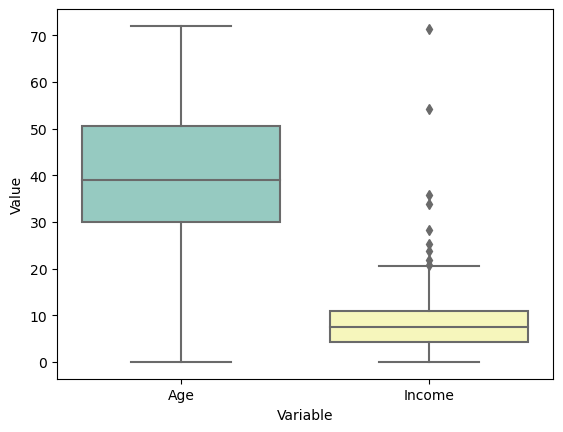

In [12]:
#Customer boxplot
sns.boxplot(data=Customer[['Age', 'Income']], orient='vertical', palette='Set3')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

#### Product

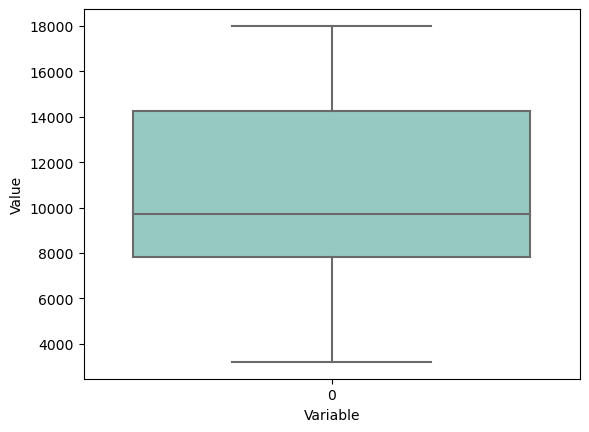

In [13]:
#Product boxplot
sns.boxplot(data=Product['Price'], orient='vertical', palette='Set3')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

In [15]:
Store['Latitude'] =Store['Latitude'].replace('[,]','.',regex=True).astype('float')
Store['Longitude'] =Store['Longitude'].replace('[,]','.',regex=True).astype('float')

#### Transaction

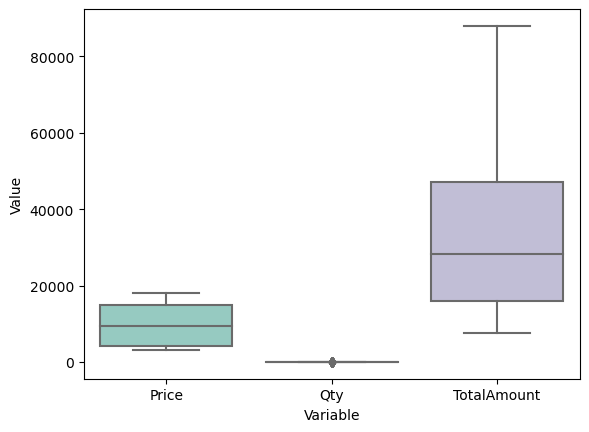

In [14]:
#Transaction boxplot
sns.boxplot(data=Transaction[['Price', 'Qty', 'TotalAmount']], orient='vertical', palette='Set3')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

In [16]:
Transaction['Date'] = pd.to_datetime(Transaction['Date'])

## Merge all data

In [17]:
all_data = Transaction.merge(Customer, on='CustomerID').merge(Product, on='ProductID').merge(Store, on='StoreID')
all_data.tail()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
5015,TR69555,221,2022-08-01,P4,12000,3,36000,4,23,1,Single,7.50,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5016,TR21587,425,2022-10-17,P4,12000,1,12000,4,58,1,Married,7.22,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5017,TR51183,409,2022-07-19,P4,12000,1,12000,4,47,0,Married,28.23,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5018,TR14963,374,2022-12-16,P4,12000,5,60000,4,32,0,Single,5.40,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5019,TR40750,271,2022-11-30,P4,12000,3,36000,4,29,0,Married,4.74,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [18]:
all_data['Date'] = pd.to_datetime(all_data['Date'])

In [20]:
new_data = all_data.groupby('Date')['Qty'].sum().reset_index()

In [21]:
#reset index agar date menjadi index
new_data.set_index('Date', inplace=True)

In [22]:
new_data

,Qty
Date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,30
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


## ARIMA 

<Axes: xlabel='Date'>

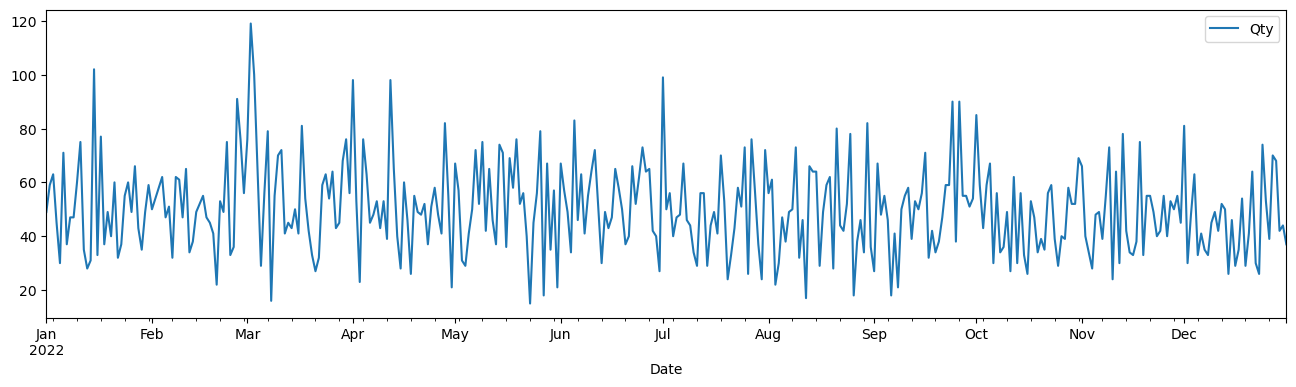

In [23]:
new_data.plot(figsize = (16, 4))

### Monthly

In [24]:
new_data_m = new_data.resample('M').mean()
new_data_m

,Qty
Date,
2022-01-31,50.322581
2022-02-28,51.464286
2022-03-31,56.548387
2022-04-30,51.800000
2022-05-31,51.258065
2022-06-30,53.066667
2022-07-31,49.419355
2022-08-31,48.129032
2022-09-30,49.966667


<Axes: xlabel='Date'>

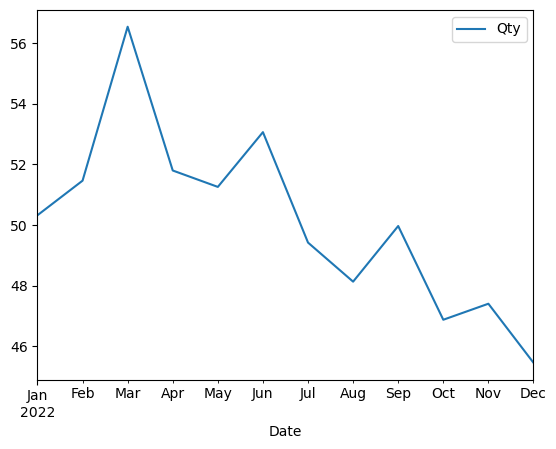

In [25]:
new_data_m.plot()

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [28]:
train_size = int(len(new_data) * 0.8)
train, test = new_data.iloc[:train_size], new_data.iloc[train_size:]

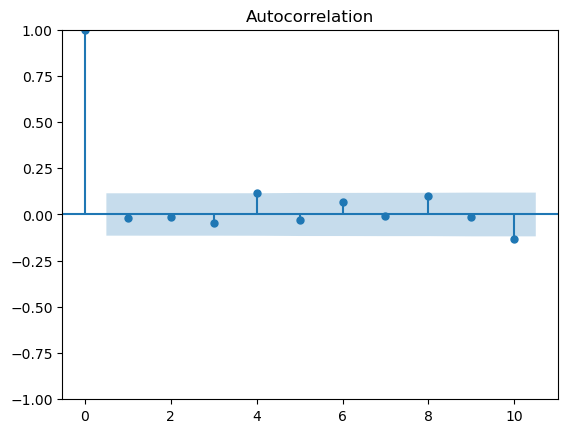

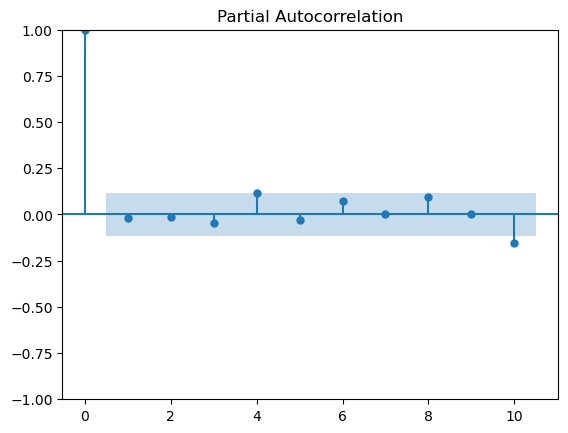

In [29]:
# Mencari nilai p dan q yang sesuai menggunakan ACF dan PACF plot
plot_acf(train, lags=10)
plot_pacf(train, lags=10)
plt.show()

In [30]:
#ADF test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train)
print(f'p-value: {adf_test[1]}')

p-value: 5.565471663498405e-30


## Modelling & Evaluation

In [38]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [35]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from math import sqrt

In [32]:
#auto-fit ARIMA
auto_arima = pm.auto_arima(train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE: 14.507282902251568


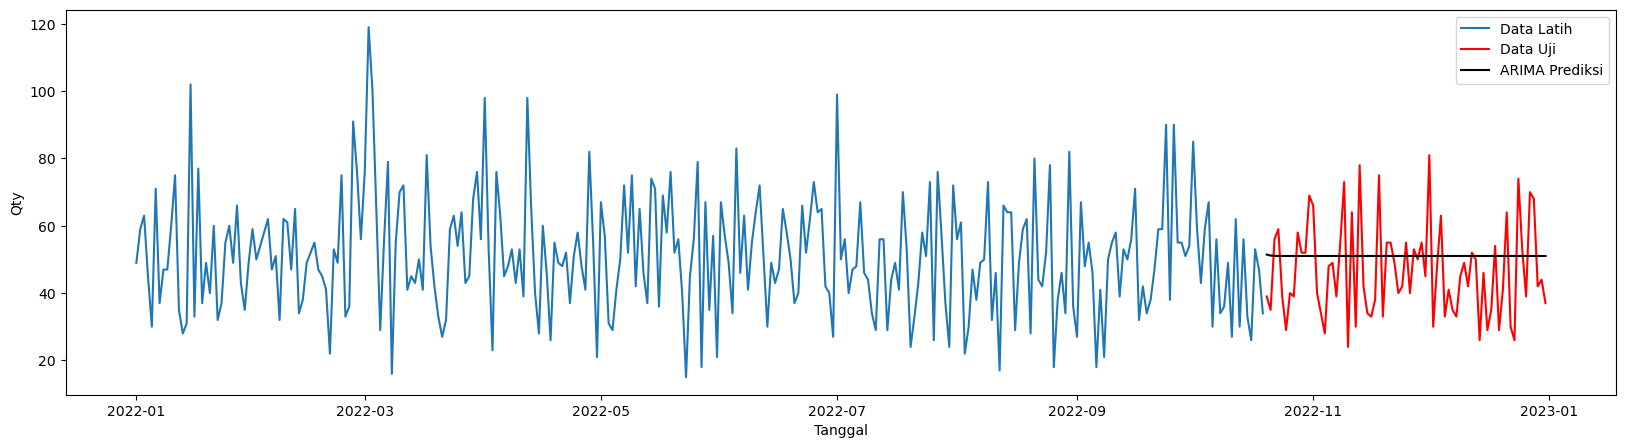

In [43]:
import math
# Persiapkan data target
y = train['Qty']

# Membangun model ARIMA
model = ARIMA(y, order=(1, 0, 1))
model_fit = model.fit()

# Membuat prediksi
y_pred = model_fit.forecast(steps=len(test))

# Menghitung RMSE
rmse = math.sqrt(mean_squared_error(test['Qty'], y_pred))
print("RMSE:", rmse)

# Plot hasil
plt.figure(figsize=(20, 5))
plt.plot(train['Qty'], label='Data Latih')
plt.plot(test['Qty'], color='red', label='Data Uji')
plt.plot(test.index, y_pred, color='black', label='ARIMA Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Qty')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 14.644565491821359


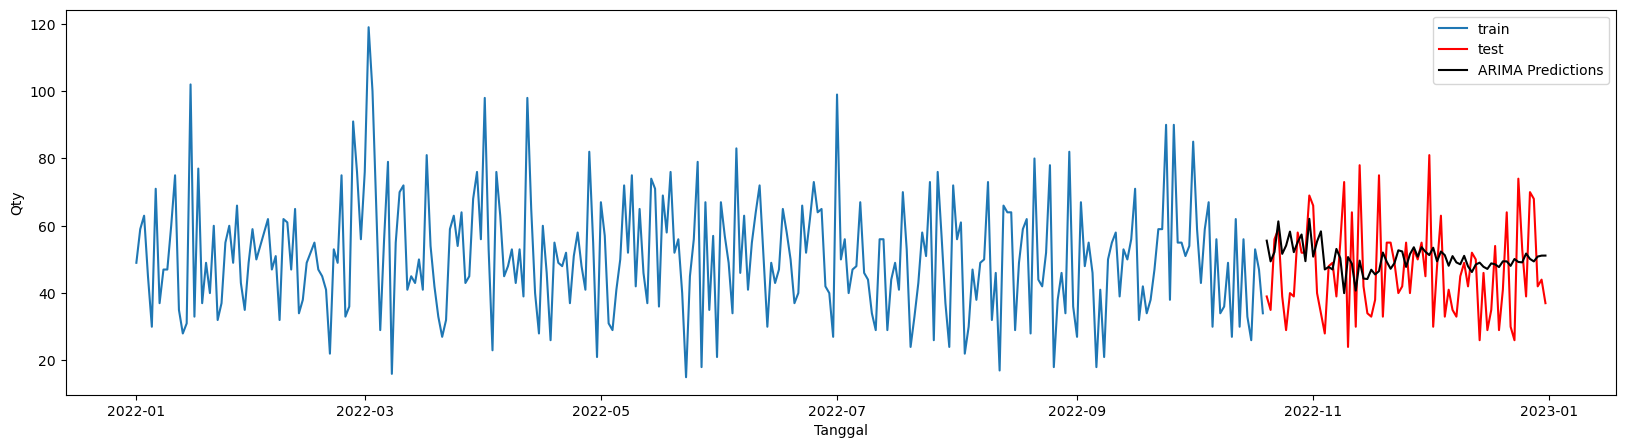

In [45]:
import math
# Persiapkan data target
y = train['Qty']

# Membangun model ARIMA
model = ARIMA(y, order=(40, 2, 1))
model_fit = model.fit()

# Membuat prediksi
y_pred = model_fit.forecast(steps=len(test))

# Menghitung RMSE
rmse = math.sqrt(mean_squared_error(test['Qty'], y_pred))
print("RMSE:", rmse)

# Plot hasil
plt.figure(figsize=(20, 5))
plt.plot(train['Qty'], label='train')
plt.plot(test['Qty'], color='red', label='test')
plt.plot(test.index, y_pred, color='black', label='ARIMA Predictions')
plt.xlabel('Tanggal')
plt.ylabel('Qty')
plt.legend()
plt.show()

In [47]:
y_pred.mean()

50.352702663596496